# The very confusing Confusion Matrix

Hi! If you are super confused by the "confusion matrix" in machine learning, you're not alone! What we are going to do is hit the reset button, start over with useful trip to the past, and actually understand this silly little 2x2 matrix!

## The Response Matrix

Let's imagine that you are trying to prove to some website that you are not a robot. You know what I'm talking about. Sometimes you get lucky and just have to check a box. Unfortunately, sometimes you get a bunch of images and you have to pick the ones with chimneys in them or something.

Like this:  
![failed to load](images/chimneys.jpeg "chimneys test")

Let's think about what you have to do... You have to  
1) PICK all of the images that DO have a chimney, and  
2) NOT PICK any of the images that DON'T have a chimney.
  
Let's think about your possible answers, whether they will by correct or incorrect and, *in what way will they be correct or incorrect*. 

If the last bit of that sentence (technically, the final clause, since we're all LAMbs here) doesn't make sense to you, just hang on! 

Let's consider the possible responses you might make, in light of whether there was actually a chimney in the  image. You can say:  
    - "yes, there *is* a chimney", and there actually is – let's call this a "hit"  
    - "no, there *isn't* a chimney", and there actually is none - call this a "correct rejection"  
    - "yes, there *is* a chimney", but there isn't – you got fooled by a tower or something – we'll call this a "false alarm"  
    - "no, there *isn't* a chimney", but in fact there is – call this a "miss"!  

Let's think about this. We have 2 possible states of the world for each image (chimney or no chimney), and 2 possible responses from you ("yes, chimney" or "nope, no chimney". We can represent this as a 2x2 matrix like so:

Like this:  
![failed to load](images/resp_matrix.jpg "response matrix")

So, if you think about this for a minute, hopefully you can see that all the responses for a challenge like this can be sorted into this matrix, and the way they sort will tell you how good the person is from telling apart images with a chimney from those without.  
For the reCaptcha image above, I might say that the 3 images in the leftmost row all have chimneys, as does the top-right one. I'd say all the other 5 do not. So my response matrix would look like this:

|             | Present | Absent |
|-------------|-------------------|------------------|
|"Chimney"    | 4                 | 0                |
|"No Chimney" | 0                 | 5                |

In this case, all 9 of my responses sort into cells on the "correct" diagonal, and no responses went into cells on the "wrong" diagonal. So I'm human after all!

---

Note that solving problems such as this is a *major* area of interest in AI and machine learning. One of the things we hope computers or robots can do for us is to spot stuff (anything from ripe cherries to enemy missiles) better than we can (robots don't get tired after all). Just like with Chess and Go, machines will probably get as good or better at these kinds of tasks then we are. Right now, however, this is an interesting problem because it's one that we do well using our own eyes, but not quite as well when we try to make a machine to do it!  
  *This is why you will run into "response" matrixes a lot in machine learning. they  just go by another name; they're called **confusion matrixes**!*

---



A child, a person from a place with no chimneys, or a machine learning algorithm might not do so well! A little kid could mistake the traffic light for a chimney in the middle image, and mistakenly think that the thing in the upper left image was a tower of some sort.  
In this case, their response matrix would look like this:

|             | Present | Absent |
|-------------|-------------------|------------------|
|"Chimney"    | 3                 | 1                |
|"No Chimney" | 1                 | 4                |

This clearly represents worse performance than in the prior case, because instead of having all 9 responses on the "correct" diagonal, we now have just 7, and we have 2 responses on the "incorrect" diagonal. But can we summarize the performance with a number? Yes, we can! In fact, we can come up with several different summaries, depending on what we want to emphasize. For example, we could compute the overall performance by looking at the ratio of **correct** responses to **all** responses, and we could call it "accuracy":  
  
``` accuracy = (hits + correct_rejections)/total_responses ```  

In the first case, that's just 9/9 or 1.0 (go me!). In the second case, we have 7/9 which is... hang on, let me get my calculator... about 0.78 – this represents the decreases accuracy from making 2 mistakes, one a false alarm (FA) and one a miss.

---

Before we delve any deeper, let's paint a little statistical picture of what's going on in your head, or in the workings of a machine learning algorithm, when doing this object identification task. You look at each image and have to decide whether there is a chimney or not. If the image is "chimneyish" enough, you say "yes, there's a chimney." Otherwise, you say "no, no chimney." So there is some part of your brain that is analyzing the *evidence* or *signal strength* for a chimney, and deciding whether the evidence is strong enough – whether there is enough *signal* to say "chimney".

So, on each trial, we could graph how much *signal* there was like this:

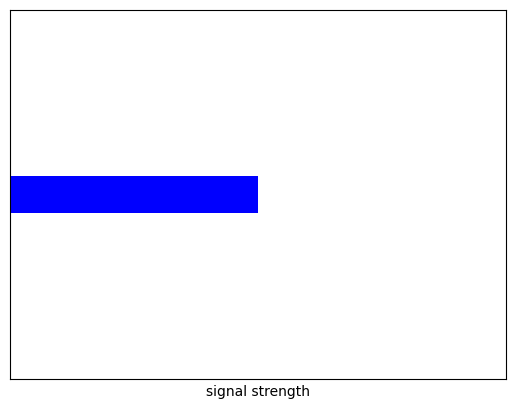

In [17]:
# Data for the bar graph
signal_strength = [0.5]  # Single bar with a value of 1

# Create the bar graph
fig, ax = plt.subplots()
ax.barh([0], signal_strength, color='blue', height=0.1)  # Horizontal bar with reduced height


# Customize the axes
ax.set_yticks([])  # Remove y-axis tick labels
ax.set_xlabel("signal strength")  # Label for x-axis
ax.set_xticks([])  # Remove x-axis tick labels
ax.set_xlim(0, 1)  # Set x-axis limits
ax.set_ylim(-0.5, 0.5)  # Set y-axis limits

# Display the plot
plt.show()

So, what do you say? Is that a chimney or not? Is there enough signal? How do you decide?  
To give your decision some context, let's look at several trials, some containing a chimney, and some not:

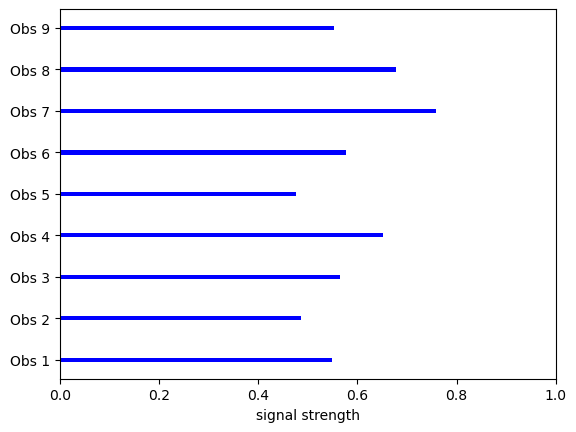

In [1]:
import numpy as np

import matplotlib.pyplot as plt

std_signal_plus_noise = 0.1
std_noise = 0.1
mean_signal_plus_noise = 0.6
mean_noise = 0.5

# Generate random samples
np.random.seed(42)  # For reproducibility
noise = np.random.normal(mean_noise, std_noise, 5)  # 5 samples from noise distribution
signal_plus_noise = np.random.normal(mean_signal_plus_noise,std_signal_plus_noise, 4)  # 4 samples from signal + noise distribution

# Combine the samples
observations = np.concatenate([noise, signal_plus_noise])

# Create the bar graph
fig, ax = plt.subplots()
ax.barh(range(len(observations)), observations, color='blue', height=0.1)

# Customize the axes
ax.set_yticks(range(len(observations)))
ax.set_yticklabels([f"Obs {i+1}" for i in range(len(observations))])
ax.set_xlabel("signal strength")
ax.set_xlim(0, 1)

# Display the plot
plt.show()

Now at least each observation has a context, which is its value with respect to the other observations. Looking at the little distribution of signal strengths, we could guess that about 1/2 are chimneys and half not, and draw a *criterion* at about - what? - about 5.5 in the figure. We'd then call everything with a chimneyness that big or bigger a "chimney" and anything smaller a non-chimney. Make sense?

Let's put these observations into histogram form:

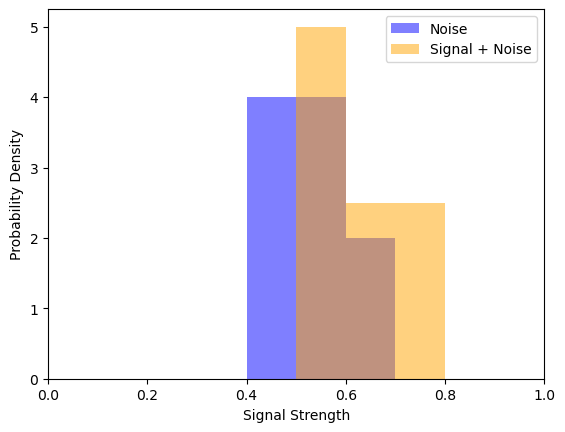

In [2]:
# Plot the probability distributions
fig, ax = plt.subplots()

# Set the x-axis limits
ax.hist(noise, bins=10, density=True, alpha=0.5, label='Noise', color='blue', range=(0, 1))
ax.hist(signal_plus_noise, bins=10, density=True, alpha=0.5, label='Signal + Noise', color='orange', range=(0, 1))
ax.set_xlim(0, 1)

# Add labels and legend
ax.set_xlabel('Signal Strength')
ax.set_ylabel('Probability Density')
ax.legend()

# Display the plot
plt.show()

Here we can see that a cutoff 0.55 or thereabouts would be sensible, but we might make a mistake or two. As they say in Southern Tazmania, C'est la vie! 

Time for some theory! Behind the curtain, reCaptcha is selecting *sample* from a bunch of random images with chimneys and a bunch of similar images without chimneys to show you. The "chimneyness" of these two *populations* of images can be represented by statistical probability distributions. Like this:

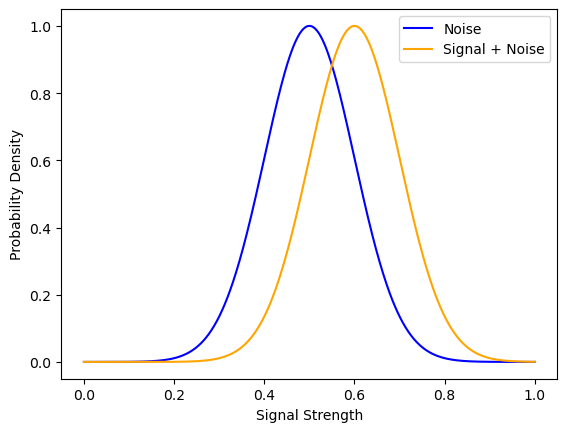

In [18]:
from scipy.stats import norm
import numpy as np

# number of points for the smooth distribution
n_points = 500

# Define the x-axis range and normalize the distributions
x = np.linspace(0, 1, n_points)
pdf_noise = norm.pdf(x, mean_noise, std_noise)
pdf_signal_plus_noise = norm.pdf(x, mean_signal_plus_noise, std_signal_plus_noise)

orig_pdf_noise = pdf_noise.copy()
orig_pdf_signal_plus_noise = pdf_signal_plus_noise.copy()

# Normalize the PDFs to a height of 1 to make the plot less confusing
pdf_noise /= pdf_noise.max()
pdf_signal_plus_noise /= pdf_signal_plus_noise.max()
x = np.linspace(0, 1, n_points)

# Plot the smooth distributions
fig, ax = plt.subplots()
ax.plot(x, pdf_noise, label='Noise', color='blue')
ax.plot(x, pdf_signal_plus_noise, label='Signal + Noise', color='orange')

# Add labels, legend, and title
ax.set_xlabel('Signal Strength')
ax.set_ylabel('Probability Density')
ax.legend()

# Display the plot
plt.show()

So, here is the universe of possible stimuli we could get in this situation. We have a better chance of getting a higher signal strength (chimneyishness!) if a chimney is indeed present (yellow curve), but we can also get some fairly high signal strength from some chimney-free images (blue curve). So what to we do?  
  
Well, again, all we can really do is establish some criterion, some cut-off, above which we will say "Chimney." and below which we will say "Not a chimney."  
Take a quick mo' to decide where the best place is to place our criterion. To do so, we kinda have to decide what we mean by "best".  

My intuition – and I'm not sure quite why – is to place the criterion in the middle of the 2 distribution, which looks to be a signal strength of about 5.5; let's draw a line there.

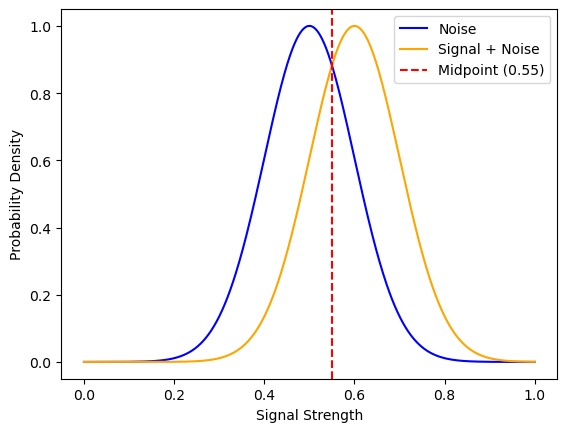

In [19]:
# Calculate the midpoint signal strength
midpoint_signal_strength = (mean_noise + mean_signal_plus_noise) / 2

# Plot the smooth distributions
fig, ax = plt.subplots()
ax.plot(x, pdf_noise, label='Noise', color='blue')
ax.plot(x, pdf_signal_plus_noise, label='Signal + Noise', color='orange')

# Add a vertical line at the midpoint signal strength
ax.axvline(midpoint_signal_strength, color='red', linestyle='--', label=f'Midpoint ({midpoint_signal_strength:.2f})')

# Add labels, legend, and title
ax.set_xlabel('Signal Strength')
ax.set_ylabel('Probability Density')
ax.legend()

# Display the plot
plt.show()

Hey, wait! This picture might be starting to ring some bells for you LAMbs that have had the great misfortune to have taken a stats class! We have 2 distributions, one representing the "no chimney" or "nothing" or "null" universe (hypothesis?), another representing the "chimney" or "signal" or "alternative" universe, and a cut-off or criterion above which we will say "Chimney!" or, in stats jargon, "reject the null hypothesis in favor of the alternative hypothesis." Whatever... you get the picture!

Let's shade in the area under the "noise only" curve that's above the cut-off:

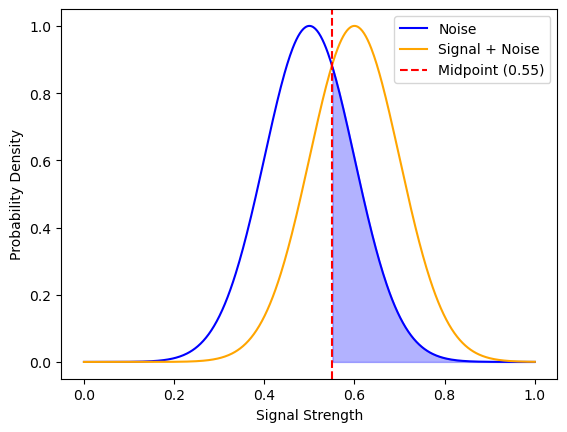

In [20]:
# Plot the smooth distributions with shaded areas
fig, ax = plt.subplots()

# Plot the PDFs
ax.plot(x, pdf_noise, label='Noise', color='blue')
ax.plot(x, pdf_signal_plus_noise, label='Signal + Noise', color='orange')

# Fill the areas under the curves
""" 
ax.fill_between(x, pdf_noise, color='blue', alpha=0.3)
ax.fill_between(x, pdf_signal_plus_noise, color='orange', alpha=0.3) 
        """
# Add a vertical line at the midpoint signal strength   
ax.axvline(midpoint_signal_strength, color='red', linestyle='--', label=f'Midpoint ({midpoint_signal_strength:.2f})')

# Shade the area under the noise distribution to the right of the vertical line
ax.fill_between(x, pdf_noise, where=(x > midpoint_signal_strength), color='blue', alpha=0.3)

# Add labels, legend, and title
ax.set_xlabel('Signal Strength')
ax.set_ylabel('Probability Density')
ax.legend()

# Display the plot
plt.show()

The error under the blue curve to the right of our criterion is our *False Alarm Rate* or what a statistician would call "alpha". In many studies in the social and biological sciences, this is often arbitrarily set to 0.05, which is stupid. This area represents the probability that you'll get an image with no chimney, but it will have enough "chimneyosity" to make you say "Chimney." In this case, you're going to make some false alarms, right? The only way to avoid false alarms would be to move your criterion over to the right, right? But if you do so, you're would pay for it by missing a bunch of real chimneys. Make sure you see that before you move on!

The remainder of the area under the blue curve represents our *Correct Rejection Rate*. Notice that if we shift our criterion, we can make our CR rate go up or down as we wish – we can get as many correct (CRs) as we want our of the chimney-free world, but our incorrects, our FAs, will go down or up in lock-step. It's like robbing Peter to pay Paul (as they also say in Southern Tazmania)!

What if there is a chimney in the image? In this case, our probabilities of being right or wrong are given by the yellow curve. We'll get it right if we get a signal strength to the right of our criterion:

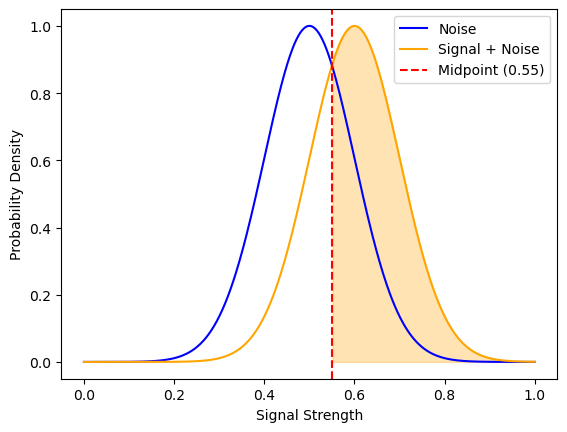

In [6]:
# Plot the smooth distributions with shaded areas
fig, ax = plt.subplots()

# Plot the PDFs
ax.plot(x, pdf_noise, label='Noise', color='blue')
ax.plot(x, pdf_signal_plus_noise, label='Signal + Noise', color='orange')

# Fill the areas under the curves
""" 
ax.fill_between(x, pdf_noise, color='blue', alpha=0.3)
ax.fill_between(x, pdf_signal_plus_noise, color='orange', alpha=0.3) 
"""

# Add a vertical line at the midpoint signal strength   
ax.axvline(midpoint_signal_strength, color='red', linestyle='--', label=f'Midpoint ({midpoint_signal_strength:.2f})')

# Shade the area under the noise distribution to the right of the vertical line
ax.fill_between(x, pdf_signal_plus_noise, where=(x > midpoint_signal_strength), color='orange', alpha=0.3)

# Add labels, legend, and title
ax.set_xlabel('Signal Strength')
ax.set_ylabel('Probability Density')
ax.legend()

# Display the plot
plt.show()

In this figure, the shaded orange area represents the probability that we will get an image with enough chimneyness (chimneyosity?) to make us say "Yes, there's a chimney in here." That's a *Hit*! The remaining unshaded area under the orange curve represents our probability of saying "Nope, no chimney." when in fact there was. That's a *Miss*. As you can see, if we change our criterion to get more Hits (moving it left to lower numbers), we will simultaneously reduce our probability of a Miss, which seems good but – beware! – remember that the criterion also dictates our responses to "no chimney" images, and we will increase our FA rate!  
  
Everything comes with a price. If we try to increase our Hit rate (good), we'll also increase our FA rate (bad). If we try to increase our Correct Rejection rate (good), we'll also increase our Miss rate (bad).

Let's calculate the response matrix for this situation:

In [23]:
hit_rate = orig_pdf_signal_plus_noise[x > midpoint_signal_strength].sum()/ n_points
FA_rate = orig_pdf_noise[x > midpoint_signal_strength].sum()/ n_points
miss_rate = 1 - hit_rate
CR_rate = 1 - FA_rate

In [24]:
print(f"Hit Rate: {hit_rate:.2f}")
print(f"False Alarm Rate: {FA_rate:.2f}")
print(f"Miss Rate: {miss_rate:.2f}")
print(f"Correct Rejection Rate: {CR_rate:.2f}")

Hit Rate: 0.69
False Alarm Rate: 0.31
Miss Rate: 0.31
Correct Rejection Rate: 0.69


So our response matrix, in probabilty form, would look like this:

|             | Present | Absent |
|-------------|-------------------|------------------|
|"Chimney"    | 0.69              | 0.31             |
|"No Chimney" | 0.31              | 0.69             |

Let's calculate our accuracy score for this situation. From above, accuracy is defined as:


  ```accuracy = (hits + correct_rejections)/total_responses```

With a little algebra we can see that, since we're working with probabilities, the accuracy in this case is equal to the hit rate (or, equivalently, the CR rate).

In [25]:
accuracy = (hit_rate + CR_rate) / 2
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.69


---

## Let's change the criterion around!

Recall that we choose the criterion above based on intuition. We could have put it anywhere! So let's see what happens when we change our threshold for saying "Chimney" vs. "No chimney." Let's move it over to the right to 0.7 to see what happens!

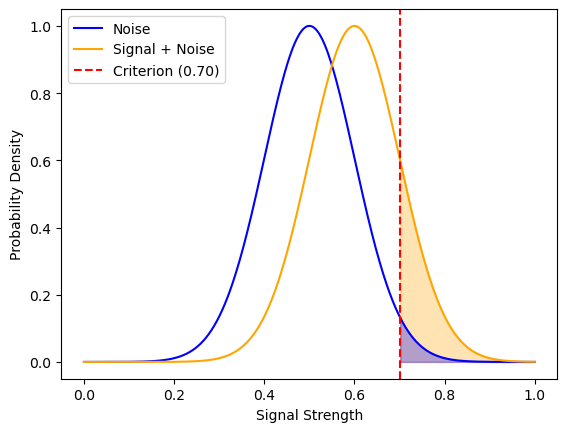

In [27]:
criterion = 0.7

# Plot the smooth distributions with shaded areas
fig, ax = plt.subplots()

# Plot the PDFs
ax.plot(x, pdf_noise, label='Noise', color='blue')
ax.plot(x, pdf_signal_plus_noise, label='Signal + Noise', color='orange')

# Fill the areas under the curves
""" 
ax.fill_between(x, pdf_noise, color='blue', alpha=0.3)
ax.fill_between(x, pdf_signal_plus_noise, color='orange', alpha=0.3) 
"""

# Add a vertical line at the midpoint signal strength   
ax.axvline(criterion, color='red', linestyle='--', label=f'Criterion ({criterion:.2f})')

# Shade the area under the noise distribution to the right of the vertical line
ax.fill_between(x, pdf_signal_plus_noise, where=(x > criterion), color='orange', alpha=0.3)
# Shade the area under the noise distribution to the right of the vertical line
ax.fill_between(x, pdf_noise, where=(x > criterion), color='blue', alpha=0.3)

# Add labels, legend, and title
ax.set_xlabel('Signal Strength')
ax.set_ylabel('Probability Density')
ax.legend()

# Display the plot
plt.show()

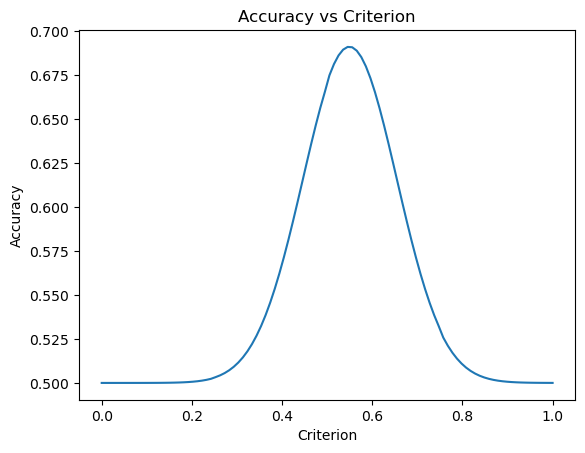

In [10]:
criteria = np.linspace(0, 1, 100)
hit_rates = []
FA_rates = []
miss_rates = []
CR_rates = []   
accuracies = []
for criterion in criteria:
    hit_rate = orig_pdf_signal_plus_noise[x > criterion].sum()/ n_points
    FA_rate = orig_pdf_noise[x > criterion].sum()/ n_points
    miss_rate = 1 - hit_rate
    CR_rate = 1 - FA_rate
    
    hit_rates.append(hit_rate)
    FA_rates.append(FA_rate)
    miss_rates.append(miss_rate)
    CR_rates.append(CR_rate)

    # compute accuracy for each criterion
    accuracy = (hit_rate + CR_rate) / (hit_rate + miss_rate + CR_rate + FA_rate)
    #print(f"Criterion: {criterion:.2f}, Accuracy: {accuracy:.2f}")
    accuracies.append(accuracy)


# plot accuracy vs criterion
plt.plot(criteria, accuracies)
plt.xlabel('Criterion')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Criterion')
plt.show()
# Plot the ROC curve
    

We could compute all kinds of fun stuff if we wanted to. For example, we could focus only on the "Chimney!" answers by making a ratio of the correct "Chimney" answers over all "Chimney" answers, correct and incorrect. This would be the hit rate divided by the hit rate + the false alarm rate. Machine learning people call this "precision" but I thing a better word would be "selectivity" because "precision" already has a different definition in the stats world. Oh well.


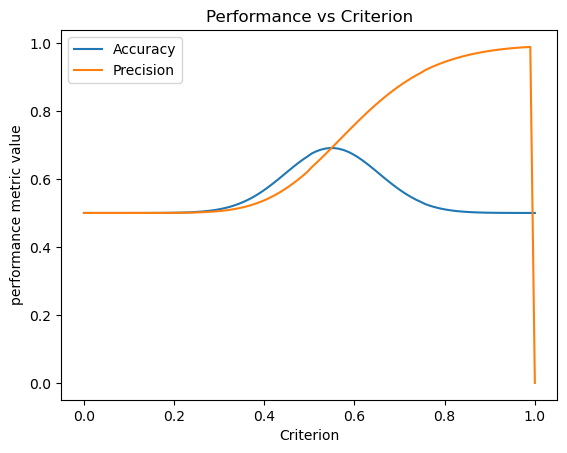

In [11]:
criteria = np.linspace(0, 1, 100)
hit_rates = []
FA_rates = []
miss_rates = []
CR_rates = []   
accuracies = []
precisions = []
for criterion in criteria:
    hit_rate = orig_pdf_signal_plus_noise[x > criterion].sum()/ n_points
    FA_rate = orig_pdf_noise[x > criterion].sum()/ n_points
    miss_rate = 1 - hit_rate
    CR_rate = 1 - FA_rate
    
    hit_rates.append(hit_rate)
    FA_rates.append(FA_rate)
    miss_rates.append(miss_rate)
    CR_rates.append(CR_rate)

    # compute accuracy for each criterion
    accuracy = (hit_rate + CR_rate) / (hit_rate + miss_rate + CR_rate + FA_rate)
    #print(f"Criterion: {criterion:.2f}, Accuracy: {accuracy:.2f}")
    accuracies.append(accuracy)

    # compute precision for each criterion
    precision = hit_rate / (hit_rate + FA_rate) if (hit_rate + FA_rate) > 0 else 0
    precisions.append(precision)


# plot accuracy vs criterion
plt.plot(criteria, accuracies)
plt.plot(criteria, precisions)
plt.xlabel('Criterion')
plt.ylabel('performance metric value')
plt.title('Performance vs Criterion')
plt.legend(['Accuracy', 'Precision'])
plt.show()
# Plot the ROC curve
    

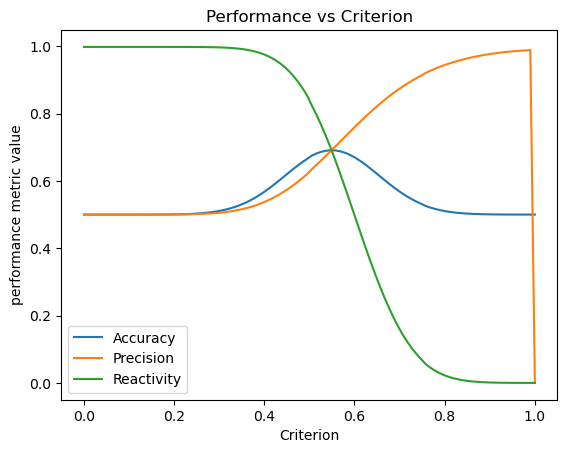

In [12]:
criteria = np.linspace(0, 1, 100)
hit_rates = []
FA_rates = []
miss_rates = []
CR_rates = []   
accuracies = []
precisions = []
reactivities = []

for criterion in criteria:
    hit_rate = orig_pdf_signal_plus_noise[x > criterion].sum()/ n_points
    FA_rate = orig_pdf_noise[x > criterion].sum()/ n_points
    miss_rate = 1 - hit_rate
    CR_rate = 1 - FA_rate
    
    hit_rates.append(hit_rate)
    FA_rates.append(FA_rate)
    miss_rates.append(miss_rate)
    CR_rates.append(CR_rate)

    # compute accuracy for each criterion
    accuracy = (hit_rate + CR_rate) / (hit_rate + miss_rate + CR_rate + FA_rate)
    #print(f"Criterion: {criterion:.2f}, Accuracy: {accuracy:.2f}")
    accuracies.append(accuracy)

    # compute precision for each criterion
    precision = hit_rate / (hit_rate + FA_rate) if (hit_rate + FA_rate) > 0 else 0
    precisions.append(precision)

    # compute reactivity or "recall" for each criterion
    reactivity = hit_rate / (hit_rate + miss_rate) if (hit_rate + miss_rate) > 0 else 0
    reactivities.append(reactivity)

# plot accuracy vs criterion
plt.plot(criteria, accuracies)
plt.plot(criteria, precisions)
plt.plot(criteria, reactivities)
plt.xlabel('Criterion')
plt.ylabel('performance metric value')
plt.title('Performance vs Criterion')
plt.legend(['Accuracy', 'Precision', 'Reactivity'])
plt.show()
# Plot the ROC curve
    

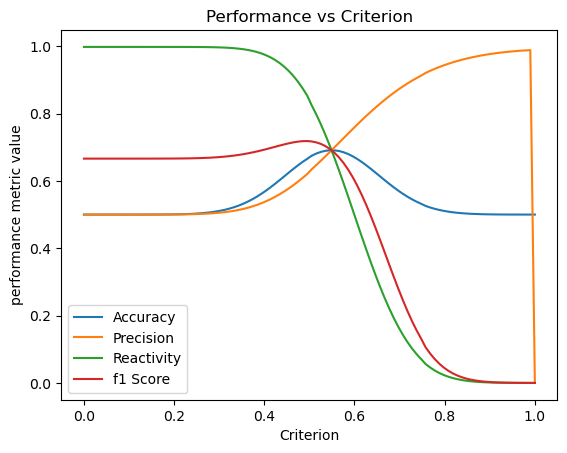

In [13]:
criteria = np.linspace(0, 1, 100)
hit_rates = []
FA_rates = []
miss_rates = []
CR_rates = []   
accuracies = []
precisions = []
reactivities = []
f1_scores = []

for criterion in criteria:
    hit_rate = orig_pdf_signal_plus_noise[x > criterion].sum()/ n_points
    FA_rate = orig_pdf_noise[x > criterion].sum()/ n_points
    miss_rate = 1 - hit_rate
    CR_rate = 1 - FA_rate
    
    hit_rates.append(hit_rate)
    FA_rates.append(FA_rate)
    miss_rates.append(miss_rate)
    CR_rates.append(CR_rate)

    # compute accuracy for each criterion
    accuracy = (hit_rate + CR_rate) / (hit_rate + miss_rate + CR_rate + FA_rate)
    #print(f"Criterion: {criterion:.2f}, Accuracy: {accuracy:.2f}")
    accuracies.append(accuracy)

    # compute precision for each criterion
    precision = hit_rate / (hit_rate + FA_rate) if (hit_rate + FA_rate) > 0 else 0
    precisions.append(precision)

    # compute reactivity or "recall" for each criterion
    reactivity = hit_rate / (hit_rate + miss_rate) if (hit_rate + miss_rate) > 0 else 0
    reactivities.append(reactivity)

    # compute F1 score for each criterion - the harmonic mean of precision and recall       
    f1score = 2 * (precision * reactivity) / (precision + reactivity) if (precision + reactivity) > 0 else 0
    f1_scores.append(f1score)

# plot accuracy vs criterion
plt.plot(criteria, accuracies)
plt.plot(criteria, precisions)
plt.plot(criteria, reactivities)
plt.plot(criteria, f1_scores)
plt.xlabel('Criterion')
plt.ylabel('performance metric value')
plt.title('Performance vs Criterion')
plt.legend(['Accuracy', 'Precision', 'Reactivity', 'f1 Score'])
plt.show()
# Plot the ROC curve
    

Plot just accuracy and f1

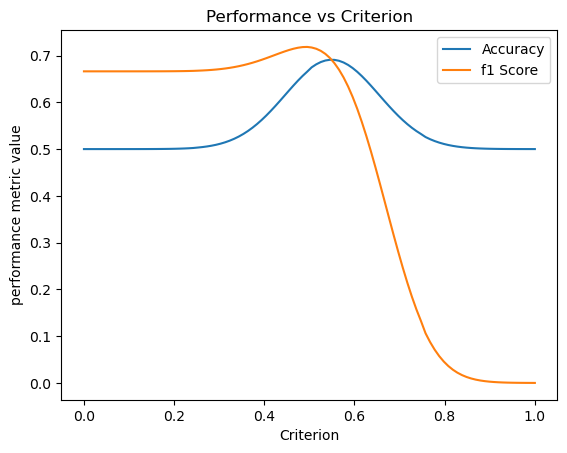

In [14]:
# plot just accuracy and f1 score vs criterion
plt.plot(criteria, accuracies)
plt.plot(criteria, f1_scores)
plt.xlabel('Criterion')
plt.ylabel('performance metric value')
plt.title('Performance vs Criterion')
plt.legend(['Accuracy', 'f1 Score'])
plt.show()

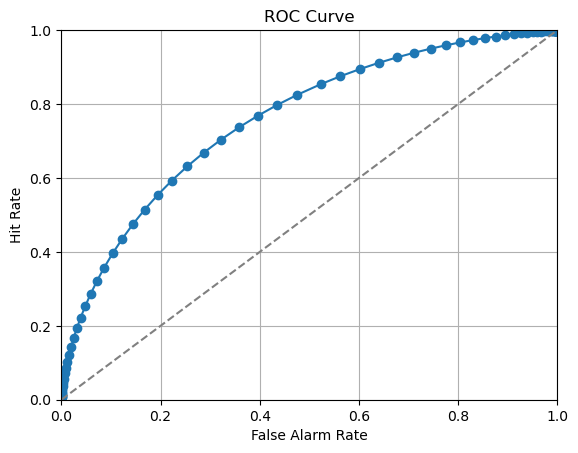

In [15]:
# plot the ROC curve
fig, ax = plt.subplots()
ax.plot(FA_rates, hit_rates, marker='o')
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Hit Rate')
ax.set_title('ROC Curve')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.grid()
plt.show()

In [16]:
# calculate d-prime
d_prime = norm.ppf(hit_rate) - norm.ppf(FA_rate)
print(f"d-prime: {d_prime:.2f}")
# calculate beta
beta = np.exp((norm.ppf(FA_rate) ** 2 - norm.ppf(hit_rate) ** 2) / 2)
print(f"beta: {beta:.2f}")
   

d-prime: nan
beta: nan


/var/folders/bz/sm93lzvd6y3c9yqml1pgq2kc0000gn/T/ipykernel_5690/1711240206.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  d_prime = norm.ppf(hit_rate) - norm.ppf(FA_rate)
/var/folders/bz/sm93lzvd6y3c9yqml1pgq2kc0000gn/T/ipykernel_5690/1711240206.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  beta = np.exp((norm.ppf(FA_rate) ** 2 - norm.ppf(hit_rate) ** 2) / 2)
